## Result Analysis

In [29]:
import pandas as pd 
import numpy as np 
import os 
import requests
import time 
import logging
import matplotlib.pylab as plt 
import matplotlib

plt.style.use('seaborn-whitegrid')


#===
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 20),
          'font.family': 'serif',
          'font.sans-serif':'DejaVu Sans',
         'axes.titlesize':'30', 
#         'axes.labelize':'100',
        'axes.labelsize': 15,
          'grid.alpha': '.5',
         'xtick.labelsize':15,
         'ytick.labelsize':10
         }

plt.rcParams.update(params)

In [30]:
datum = pd.read_csv('ripple_trend_result.csv',skiprows=[0])
datum = datum[~datum['datetime'].isna()]
# datum= datum[~datum['volume'].isna()]

datum['datetime'] = [pd.Timestamp(e) for e in datum['datetime'].values]
_cols =['Id',
      
 
        'datetime', 
        'open','high', 'low', 'close',
#         'Dummy', 

        'BuySell',
 
        'buy', 
        'sell', 

        'value'
       ]
data = datum[_cols].copy()
data.head(3)

,Id,datetime,open,high,low,close,BuySell,buy,sell,value
0,1,2021-03-01,0.4154,0.4552,0.4130,0.4457,BuySell,NaN,NaN,1000.0
1,2,2021-03-02,0.4457,0.4561,0.4206,0.4361,BuySell,NaN,NaN,1000.0
2,3,2021-03-03,0.4361,0.4682,0.4306,0.4486,BuySell,NaN,NaN,1000.0


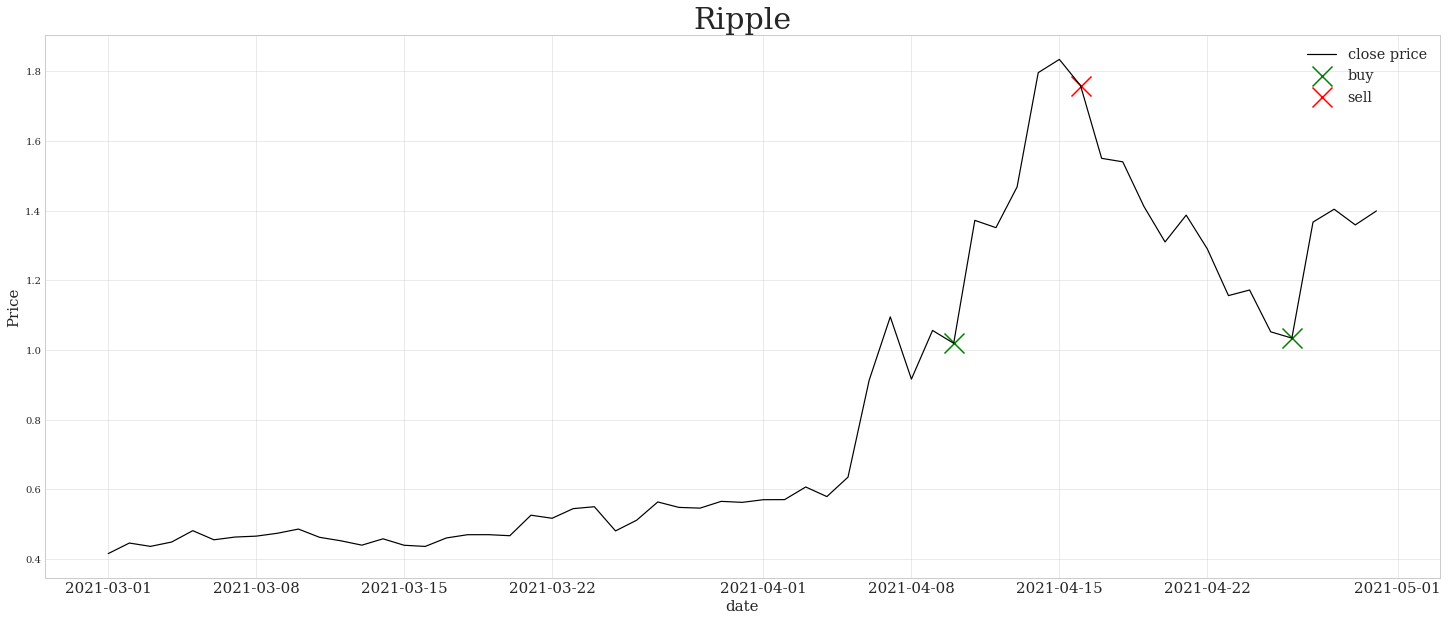

In [35]:
name = 'Ripple'

#buy signal
tmp_buy = data[~data['buy'].isna()]
#sell signal
tmp_sell = data[~data['sell'].isna()]



fig,ax = plt.subplots(figsize=(25,10))

x_val = tmp_buy['datetime'].values
y_val = tmp_buy['buy'].values

ax.scatter(x_val,y_val,color='green',label='buy',marker='x',s=400)


x_val = tmp_sell['datetime'].values
y_val = tmp_sell['sell'].values
ax.scatter(x_val,y_val,color='red',label='sell',s=400,marker='x')


ax.plot(data['datetime'],data['open'],color='black',label='close price',lw=1.2)
plt.legend()
plt.grid(True)
plt.xlabel('date')
plt.ylabel('Price')
plt.title(f'{name}')
plt.show()
plt.close()
